In [1]:
import pandas as pd
import os
from utils import buildDataset, analyze_svm_results, getCountOfIntersectionOfSupportVectors
import numpy as np
from svm import SupportVectorMachine
import time

# for 3rd part
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Question 1:: Binary Classification

d = 4 # since my entry id ends in 84
inputClasses = [d, (d+1)%10]

results = {}

In [3]:
print("------Building train set------")
trainingSet = buildDataset(basePath="train", inputClasses = inputClasses)
trainingSet.head()

------Building train set------
Loaded deer → X: (1667, 3072), y: (1667,)
Loaded dog → X: (1667, 3072), y: (1667,)
Suffling to mix both classes

Final Dataset Shape train: (3334, 3073)


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,0.278431,0.364706,0.113725,0.290196,0.376471,0.125490,0.298039,0.392157,0.149020,0.305882,...,0.192157,0.188235,0.258824,0.180392,0.160784,0.250980,0.149020,0.117647,0.211765,-1
1,0.717647,0.772549,0.807843,0.725490,0.776471,0.811765,0.752941,0.776471,0.823529,0.760784,...,0.541176,0.376471,0.282353,0.529412,0.349020,0.258824,0.533333,0.352941,0.258824,-1
2,0.219608,0.196078,0.211765,0.215686,0.192157,0.207843,0.219608,0.184314,0.196078,0.211765,...,0.376471,0.274510,0.145098,0.231373,0.117647,0.000000,0.639216,0.521569,0.380392,-1
3,0.474510,0.521569,0.568627,0.466667,0.505882,0.552941,0.419608,0.427451,0.478431,0.227451,...,0.356863,0.278431,0.313726,0.352941,0.270588,0.298039,0.337255,0.247059,0.278431,-1
4,0.270588,0.396078,0.301961,0.274510,0.403922,0.298039,0.294118,0.411765,0.309804,0.313726,...,0.145098,0.278431,0.211765,0.129412,0.215686,0.164706,0.098039,0.168627,0.121569,1


In [4]:
print("------Building test set------")
testingSet = buildDataset(basePath="test", inputClasses = inputClasses)
testingSet.head()

------Building test set------
Loaded deer → X: (333, 3072), y: (333,)
Loaded dog → X: (333, 3072), y: (333,)
Suffling to mix both classes

Final Dataset Shape test: (666, 3073)


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,0.498039,0.325490,0.384314,0.447059,0.286275,0.341176,0.443137,0.301961,0.349020,0.447059,...,0.486275,0.349020,0.427451,0.474510,0.321569,0.403922,0.443137,0.290196,0.372549,-1
1,0.211765,0.317647,0.196078,0.494118,0.600000,0.478431,0.258824,0.349020,0.239216,0.196078,...,0.215686,0.313726,0.301961,0.141176,0.247059,0.172549,0.066667,0.184314,0.074510,1
2,0.231373,0.156863,0.164706,0.133333,0.058824,0.066667,0.141176,0.066667,0.074510,0.160784,...,0.670588,0.513726,0.556863,0.670588,0.513726,0.556863,0.662745,0.513726,0.556863,-1
3,0.639216,0.686275,0.670588,0.545098,0.592157,0.576471,0.635294,0.670588,0.650980,0.713726,...,0.741176,0.709804,0.701961,0.721569,0.686275,0.690196,0.764706,0.729412,0.733333,1
4,0.501961,0.247059,0.231373,0.439216,0.200000,0.180392,0.380392,0.156863,0.129412,0.341176,...,0.705882,0.470588,0.266667,0.666667,0.439216,0.243137,0.635294,0.415686,0.215686,-1


  custom SVM training ran in   : 17.4614s
Custom SVM :: Train Accuracy with linear kernel:  0.8629274145170965
Custom SVM :: Test Accuracy with linear kernel:  0.6651651651651652

================= SVM Analysis =================
(a) Number of Support Vectors: 1900
    Percentage of Training Samples that constitute the support vectors: 56.99%

(b) Model Parameters and Test Accuracy:
    Weight Vector (w): shape = (3072,)
    Intercept (b): 0.7729
    ✅ Test Accuracy: 66.52%

(c) Visualization:


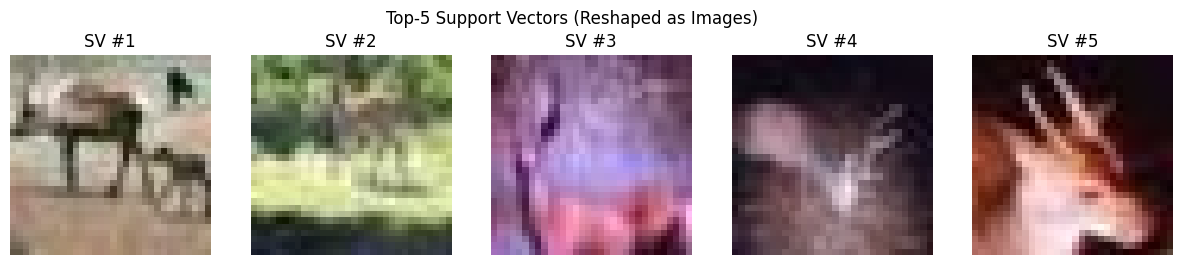

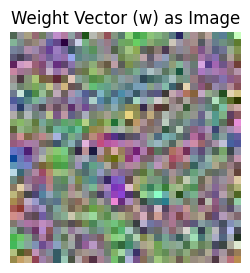

In [5]:
# Training Binary Classification problem with a linear model using CVXOPT package
svm_linear = SupportVectorMachine()
X_train, y_train = trainingSet.iloc[:, :-1], trainingSet.iloc[:, -1]

startTime = time.time()
svm_linear.fit(X_train, y_train, kernel='linear', C=1.0)

results["Training time for Linear Kernel SVM"] = time.time() - startTime
print(f"  custom SVM training ran in   : {results["Training time for Linear Kernel SVM"]:.4f}s")

preds = svm_linear.predict(X_train)
print("Custom SVM :: Train Accuracy with linear kernel: ", np.mean(preds == y_train))

X_test, y_test = testingSet.iloc[:, :-1], testingSet.iloc[:, -1]

preds = svm_linear.predict(X_test)
print("Custom SVM :: Test Accuracy with linear kernel: ", np.mean(preds == y_test))

results["Test Accuracy with linear Kernel SVM"] = analyze_svm_results(svm_linear, X_train, y_train, X_test, y_test, image_shape=(32, 32, 3))

  custom SVM training ran in   : 45.2929s
Custom SVM :: Train Accuracy with gaussian kernel:  0.7903419316136773
Custom SVM :: Test Accuracy with linear kernel:  0.7597597597597597
2(a) SV overlap between linear and RBF:
  Matching support vectors: 1594
  This is 83.89% of linear SVs and 69.18% of RBF SVs.


================= SVM Analysis =================
(a) Number of Support Vectors: 2304
    Percentage of Training Samples that constitute the support vectors: 69.11%

(b) Model Parameters and Test Accuracy:
    (Gaussian kernel — no explicit weight vector w)
    Intercept (b): -7.1906
    ✅ Test Accuracy: 75.98%

(c) Visualization:


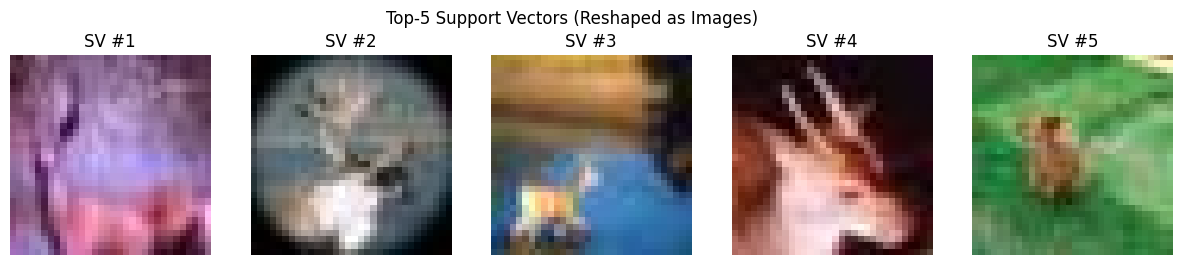


(d) Comparison of test accuracies:
  Linear test acc: 66.52%
  RBF test acc:    75.98%


In [6]:
# Training Binary Classification problem with a gaussian model using CVXOPT package
svm_gaussian = SupportVectorMachine()
X_train, y_train = trainingSet.iloc[:, :-1], trainingSet.iloc[:, -1]

startTime = time.time()
svm_gaussian.fit(X_train, y_train, kernel='gaussian', C=1.0)

results["Training time for Gaussian Kernel SVM"] = time.time() - startTime
print(f"  custom SVM training ran in   : {results["Training time for Gaussian Kernel SVM"]:.4f}s")

preds = svm_gaussian.predict(X_train)
print("Custom SVM :: Train Accuracy with gaussian kernel: ", np.mean(preds == y_train))

X_test, y_test = testingSet.iloc[:, :-1], testingSet.iloc[:, -1]

preds = svm_gaussian.predict(X_test)
print("Custom SVM :: Test Accuracy with linear kernel: ", np.mean(preds == y_test))

# Additional Question :: Report how many support vectors obtained here match with the linear case
getCountOfIntersectionOfSupportVectors(svm_linear, svm_gaussian)
results["Test Accuracy with Gaussian Kernel SVM"] = analyze_svm_results(svm_gaussian, X_train, y_train, X_test, y_test, image_shape=(32, 32, 3))

print("(d) Comparison of test accuracies:")
print(f"  Linear test acc: {results["Test Accuracy with linear Kernel SVM"] :.2f}%")
print(f"  RBF test acc:    {results["Test Accuracy with Gaussian Kernel SVM"] :.2f}%")

In [7]:
results

{'Training time for Linear Kernel SVM': 17.461440563201904,
 'Test Accuracy with linear Kernel SVM': np.float64(66.51651651651652),
 'Training time for Gaussian Kernel SVM': 45.292908906936646,
 'Test Accuracy with Gaussian Kernel SVM': np.float64(75.97597597597597)}

In [8]:
# ------------------------------------------------------------------
# 3(a) Train scikit-learn SVMs (Linear & Gaussian)
# ------------------------------------------------------------------
print("===== Scikit-learn (LIBSVM) comparison =====")

# Linear kernel
start_time = time.time()
sk_lin = SVC(kernel="linear", C=1.0)
sk_lin.fit(X_train, y_train)
train_time_lin = time.time() - start_time

# Gaussian (RBF) kernel
start_time = time.time()
sk_rbf = SVC(kernel="rbf", C=1.0, gamma=0.001)
sk_rbf.fit(X_train, y_train)
train_time_rbf = time.time() - start_time

# ------------------------------------------------------------------
# Predictions & Accuracies
# ------------------------------------------------------------------
y_pred_sk_lin = sk_lin.predict(X_test)
y_pred_sk_rbf = sk_rbf.predict(X_test)

acc_sk_lin = accuracy_score(y_test, y_pred_sk_lin) * 100
acc_sk_rbf = accuracy_score(y_test, y_pred_sk_rbf) * 100

print(f"(c) Test Accuracies (scikit-learn)")
print(f"  Linear : {acc_sk_lin:.2f}%")
print(f"  RBF    : {acc_sk_rbf:.2f}%\n")

# ------------------------------------------------------------------
# (a) Compare nSV (number of support vectors)
# ------------------------------------------------------------------
nsv_sk_lin = len(sk_lin.support_)
nsv_sk_rbf = len(sk_rbf.support_)

print("(a) Support vector counts:")
print(f"  CVXOPT Linear   : {len(svm_linear.support_indices)}")
print(f"  sklearn Linear  : {nsv_sk_lin}")
print(f"  CVXOPT RBF      : {len(svm_gaussian.support_indices)}")
print(f"  sklearn RBF     : {nsv_sk_rbf}")

# Compare overlap of support vectors with CVXOPT ones
sv_lin_set = set(svm_linear.support_indices.tolist())
sv_rbf_set = set(svm_gaussian.support_indices.tolist())

sk_lin_set = set(sk_lin.support_.tolist())
sk_rbf_set = set(sk_rbf.support_.tolist())

overlap_lin = len(sv_lin_set.intersection(sk_lin_set))
overlap_rbf = len(sv_rbf_set.intersection(sk_rbf_set))

print(f"\n  Overlap (Linear): {overlap_lin} common SVs")
print(f"  Overlap (RBF)   : {overlap_rbf} common SVs\n")

# ------------------------------------------------------------------
# (b) Compare w and b (Linear case)
# ------------------------------------------------------------------
# sklearn gives w directly for linear kernel
w_sk_lin = sk_lin.coef_.ravel()
b_sk_lin = sk_lin.intercept_[0]

# CVXOPT linear w, b
w_cvx_lin = svm_linear.w
b_cvx_lin = svm_linear.bias

w_diff = np.linalg.norm(w_sk_lin - w_cvx_lin)
b_diff = abs(b_sk_lin - b_cvx_lin)

print("(b) Weight/Bias comparison (Linear):")
print(f"  ||w_sklearn - w_cvxopt||₂ = {w_diff:.6f}")
print(f"  |b_sklearn - b_cvxopt|   = {b_diff:.6f}\n")

# ------------------------------------------------------------------
# (d) Compare computational cost
# ------------------------------------------------------------------
print("(d) Computational Cost (training time in seconds):")
print(f"  CVXOPT Linear  : {results["Training time for Linear Kernel SVM"]}")
print(f"  sklearn Linear : {train_time_lin:.4f}s")
print(f"  CVXOPT RBF     : {results["Training time for Gaussian Kernel SVM"]}")
print(f"  sklearn RBF    : {train_time_rbf:.4f}s")

===== Scikit-learn (LIBSVM) comparison =====
(c) Test Accuracies (scikit-learn)
  Linear : 66.82%
  RBF    : 76.88%

(a) Support vector counts:
  CVXOPT Linear   : 1900
  sklearn Linear  : 1882
  CVXOPT RBF      : 2304
  sklearn RBF     : 2284

  Overlap (Linear): 1882 common SVs
  Overlap (RBF)   : 2284 common SVs

(b) Weight/Bias comparison (Linear):
  ||w_sklearn - w_cvxopt||₂ = 0.021438
  |b_sklearn - b_cvxopt|   = 0.035377

(d) Computational Cost (training time in seconds):
  CVXOPT Linear  : 17.461440563201904
  sklearn Linear : 11.3293s
  CVXOPT RBF     : 45.292908906936646
  sklearn RBF    : 7.3018s
